# Lab | Imbalanced data

In [1]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import OneHotEncoder, Normalizer, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


 ### 1. Load the dataset and explore the variables.

In [2]:
data = pd.read_csv('customer_churn.csv')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
data.shape

(7043, 21)

In [4]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
data = data.rename(columns={'customerID' :'Customer ID' ,
                            'SeniorCitizen' : 'Senior Citizen' ,
                            'PhoneService' : 'Phone Service',
                            'MultipleLines' : 'Multiple Lines',
                            'InternetService' : 'Internet Service', 
                            'OnlineSecurity' : 'Online Security', 
                            'OnlineBackup' : 'Online Backup', 
                            'DeviceProtection' : 'Device Protection', 
                            'TechSupport' : 'Tech Support', 
                            'StreamingTV' : 'Streaming TV', 
                            'StreamingMovies' : 'Streaming Movies' ,
                            'PaperlessBilling' : 'Paperless Billing', 
                            'PaymentMethod' : 'Payment Method' ,
                            'MonthlyCharges' : 'Monthly Charges', 
                            'TotalCharges' : 'Total Charges'})

In [6]:
data.columns = [column.lower().replace(' ', '_') for column in data.columns]

In [7]:
data.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
data.isna().sum()

customer_id          0
gender               0
senior_citizen       0
partner              0
dependents           0
tenure               0
phone_service        0
multiple_lines       0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
contract             0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
churn                0
dtype: int64

In [9]:
data['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [10]:
data['payment_method'] = data['payment_method'].astype('object') 

In [11]:
data['payment_method'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: payment_method, dtype: int64

In [12]:
data = data.set_index('customer_id')
data

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
customer_id,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [13]:
for col in data.select_dtypes('object'):
    print(data[col].value_counts(), '\n')

Male      3555
Female    3488
Name: gender, dtype: int64 

No     3641
Yes    3402
Name: partner, dtype: int64 

No     4933
Yes    2110
Name: dependents, dtype: int64 

Yes    6361
No      682
Name: phone_service, dtype: int64 

No                  3390
Yes                 2971
No phone service     682
Name: multiple_lines, dtype: int64 

Fiber optic    3096
DSL            2421
No             1526
Name: internet_service, dtype: int64 

No                     3498
Yes                    2019
No internet service    1526
Name: online_security, dtype: int64 

No                     3088
Yes                    2429
No internet service    1526
Name: online_backup, dtype: int64 

No                     3095
Yes                    2422
No internet service    1526
Name: device_protection, dtype: int64 

No                     3473
Yes                    2044
No internet service    1526
Name: tech_support, dtype: int64 

No                     2810
Yes                    2707
No internet servic

### 2. We will try to predict variable `Churn` using a logistic regression on variables `tenure`, `SeniorCitizen`,`MonthlyCharges`.

In [14]:
cat = data.select_dtypes('object')

In [15]:
y = data['tenure']
X = data.drop(['tenure'], axis=1)

In [16]:
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = object)

In [17]:
transformer = Normalizer().fit(X_num)
x_normalized = transformer.transform(X_num)
print(x_normalized.shape)

(7043, 2)


In [18]:
encoder = OneHotEncoder(handle_unknown='error', drop='first')
encoder.fit(X_cat)

OneHotEncoder(drop='first')

In [19]:
encoded = encoder.transform(X_cat).toarray()
encoded

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [20]:
X = np.concatenate([x_normalized, encoded], axis=1)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
classification = LogisticRegression(random_state=42, max_iter=10000)
classification.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=42)

In [23]:
classification.score(X_test, y_test)

0.15755855216465578

In [24]:
predictions = classification.predict(X_test)
confusion_matrix(y_test, predictions)

array([[  0,   0,   0, ...,   1,   0,   0],
       [  0, 129,   0, ...,   0,   0,   0],
       [  0,  46,   3, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   3,  30],
       [  1,   0,   0, ...,   2,   1,  20],
       [  0,   0,   0, ...,   1,   3,  70]], dtype=int64)

### 3. Extract the target variable.

In [25]:
y_test.value_counts()

1     137
72     76
2      64
70     40
3      39
     ... 
32      7
62      6
44      5
43      4
0       1
Name: tenure, Length: 73, dtype: int64

### 4. Extract the independent variables and scale them.

In [35]:
data['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [36]:
A = data[data['gender'] == 'Male'].sample(30)
B = data[data['gender'] == 'Female'].sample(30)


downsampled = pd.concat([A, B]).sample(frac=1)
downsampled

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
customer_id,,,,,,,,,,,,,,,,,,,,
7876-AEHIG,Female,0,No,Yes,51,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Bank transfer (automatic),60.15,3077,No
4686-GEFRM,Male,0,Yes,No,70,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),98.70,6858.9,No
8085-MSNLK,Female,0,Yes,No,62,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Mailed check,113.95,6891.4,No
1400-MMYXY,Male,1,Yes,No,3,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,105.90,334.65,Yes
8350-NYMVI,Female,0,No,No,39,No,No phone service,DSL,No,Yes,Yes,Yes,No,No,Month-to-month,No,Bank transfer (automatic),41.10,1597.05,No
0581-MDMPW,Female,0,No,No,24,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.95,2072.75,No
8992-CEUEN,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,18.85,18.85,No
4439-YRNVD,Female,0,No,No,10,No,No phone service,DSL,No,Yes,No,Yes,No,No,Month-to-month,No,Electronic check,36.25,374,No
8751-EDEKA,Female,0,Yes,No,28,Yes,No,Fiber optic,No,Yes,Yes,No,No,Yes,Month-to-month,No,Credit card (automatic),89.90,2433.5,No


### 5. Build the logistic regression model.

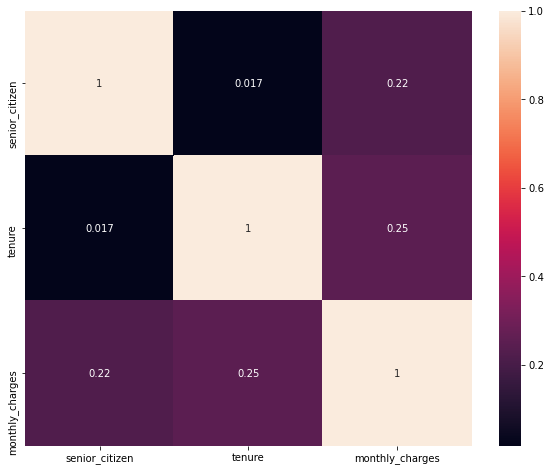

In [88]:
corr_matrix=data.corr(method='pearson') 
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

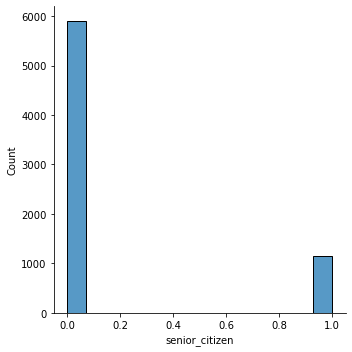

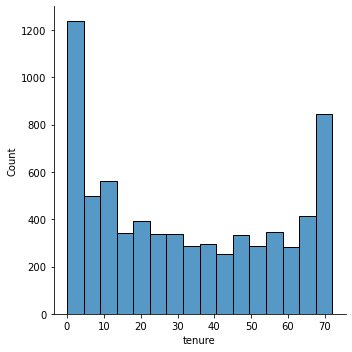

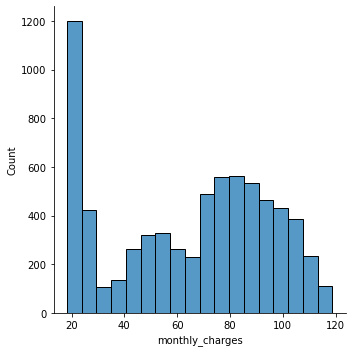

In [89]:
for col in data.select_dtypes(np.number):
    sns.displot(data[col])
    plt.show()

### 6. Evaluate the model.

In [39]:
y_test.value_counts()

1     137
72     76
2      64
70     40
3      39
     ... 
32      7
62      6
44      5
43      4
0       1
Name: tenure, Length: 73, dtype: int64

In [40]:
r2_score(y_test, predictions), mean_squared_error(y_test, predictions, squared=False), mean_squared_error(y_test, predictions)

(0.47091750146528455, 18.251223745393084, 333.1071682044003)

In [41]:
mse = mean_squared_error(y_test, predictions)
print(mse)

333.1071682044003


In [42]:

import scipy.stats as stats
import os
import math

In [43]:
rmse = math.sqrt(mse)
print(rmse)

18.251223745393084


In [44]:
r2 = r2_score(y_test, predictions)
print(r2)

0.47091750146528455


In [45]:
n = len(X_test)
p = X_test.shape[1]
adj_r2 = 1-((1-r2)*(n-1)/(n-p-1))
print(adj_r2)

1.1446220458040923


### 7. Even a simple model will give us more than 70% accuracy. Why?

### 8. Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply `imblearn.over_sampling.SMOTE` to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [33]:
!pip install imblearn

In [37]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X = data.drop('gender', axis=1)
y = data['gender']

X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

ValueError: could not convert string to float: 'Yes'

### 9. Tomek links are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process. Apply `imblearn.under_sampling.TomekLinks` to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [38]:
from imblearn.under_sampling import TomekLinks

X = data.drop('gender', axis=1)
y = data['gender']

tomek = TomekLinks()
X_tl, y_tl = tomek.fit_resample(X, y)
y_tl.value_counts()


ValueError: could not convert string to float: 'Yes'